<a href="https://colab.research.google.com/github/adityacd/Churn-Prediction-using-Machine-Learning/blob/master/Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#Importing Dataset
df = pd.read_csv('Dataset.csv')
df.head() 

,Name,Gender,Age,Payment Method,Churn,LastTransaction
0,Nicolas Garrett,male,64.0,credit card,loyal,98
1,Isaac Reyes,male,35.0,cheque,churn,118
2,Jaime Sullivan,female,25.0,credit card,loyal,107
3,Geraldine Miller,female,39.0,credit card,NaN,177
4,Curtis Frazier,male,39.0,credit card,loyal,90


In [4]:
#Identifying the missing values count
df.isna().sum()

Name                0
Gender              1
Age                 1
Payment Method      0
Churn              96
LastTransaction     0
dtype: int64

In [5]:
#Taking care of missing values Since the values are categorical.
df['Gender'] = df['Gender'].fillna(method = 'ffill')
df['Age'] = df['Age'].fillna(method = 'ffill')
df['Churn'] = df['Churn'].fillna(method = 'ffill')

In [6]:
df.isnull().sum()

Name               0
Gender             0
Age                0
Payment Method     0
Churn              0
LastTransaction    0
dtype: int64

In [7]:
#Calculating total Churn and loyal counts
df['Churn'].value_counts()

loyal    639
churn    360
Name: Churn, dtype: int64

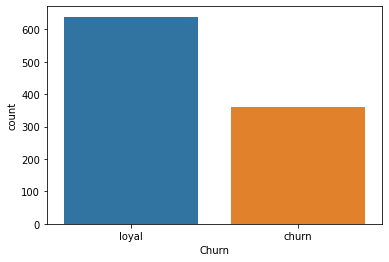

In [8]:
sns.countplot(df['Churn'], label = 'count')

In [9]:
#Identifying data types of the columns
df.dtypes

Name                object
Gender              object
Age                float64
Payment Method      object
Churn               object
LastTransaction      int64
dtype: object

In [11]:
#Encoding categorical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])
df['Payment Method'] = le.fit_transform(df['Payment Method'])
df['Gender'] = le.fit_transform(df['Gender'])
df.head(20)

,Name,Gender,Age,Payment Method,Churn,LastTransaction
0,Nicolas Garrett,1,64.0,2,1,98
1,Isaac Reyes,1,35.0,1,0,118
2,Jaime Sullivan,0,25.0,2,1,107
3,Geraldine Miller,0,39.0,2,1,177
4,Curtis Frazier,1,39.0,2,1,90
5,Jeannie Palmer,0,28.0,1,0,189
6,Phyllis Romero,0,21.0,2,1,102
7,Maxine Edwards,0,21.0,1,1,111
8,Marty Cohen,0,32.0,1,0,50
9,Lionel Mendoza,1,48.0,2,1,141


In [12]:
#Separating Dependent and Independent Variables
X = df.iloc[:,1:6]
y = df.iloc[:,4]

In [ ]:
X = X.drop('Churn', axis=1)

In [13]:
print(X)

     Gender   Age  Payment Method  Churn  LastTransaction
0         1  64.0               2      1               98
1         1  35.0               1      0              118
2         0  25.0               2      1              107
3         0  39.0               2      1              177
4         1  39.0               2      1               90
..      ...   ...             ...    ...              ...
994       0  29.0               2      1               33
995       1  84.0               2      1              124
996       1  20.0               2      1               60
997       1  19.0               2      1               49
998       0  24.0               2      1               25

[999 rows x 5 columns]


In [14]:
print(y)

0      1
1      0
2      1
3      1
4      1
      ..
994    1
995    1
996    1
997    1
998    1
Name: Churn, Length: 999, dtype: int64


In [15]:
#Test Train Spliting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1 )

In [16]:
#Feature Scaling the features for accurate prediction
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

In [17]:
print(X_train)

[[ 0.91667597 -0.30621777  0.71772241  0.77708068 -0.21089911]
 [ 0.91667597  0.64899462  0.71772241  0.77708068 -0.51749666]
 [-1.09089802 -0.1470157  -0.40456169 -1.28686766  1.21258948]
 ...
 [ 0.91667597  1.0204661   0.71772241  0.77708068 -1.24019087]
 [-1.09089802  0.48979255  0.71772241  0.77708068  0.94979159]
 [ 0.91667597  1.17966816 -1.5268458   0.77708068  1.47538738]]
